In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_2fe7195a196e4b339d6e287c9c4b00c9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ykqEbkw_JaBECNFN11YJErQRJnnqvwtJHLGg-uLwq-Ry',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_2fe7195a196e4b339d6e287c9c4b00c9.get_object(Bucket='kmeansclusteringalgorithm-donotdelete-pr-spmavkk7jh1g3x',Key='sysinfo.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body, parse_dates = [4])
df['cpu_percent'] = df['cpu_percent']*10000
df['sys_load_1'] = df['sys_load_1']*1000

df2 =df

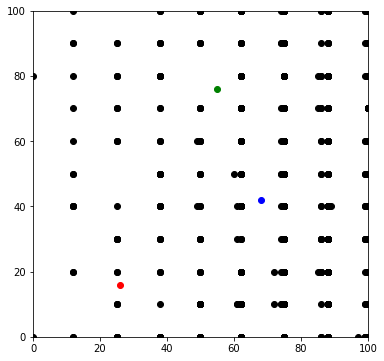

In [4]:
np.random.seed(200)
k=3
centroids = {
    
    i+1: [np.random.randint(0,100), np.random.randint(0,100)]
    for i in range(k)
    
}

fig = plt.figure(figsize = (6,6))
plt.scatter(df['cpu_percent'] , df['sys_load_1'], color= 'k')
colmap = {1: 'r',2: 'b',3: 'g'}

for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()


      cpu_freq  cpu_percent  sys_load_1  temperature  \
0  1652.985500        819.0       670.0           38   
1  1751.238375        746.0       590.0           38   
2  1644.140375        564.0       600.0           40   
3  1827.442625        925.0       610.0           40   
4  1797.277125        794.0       460.0           39   

                   timestamp  distance_from_1  distance_from_2  \
0 2018-05-10 00:00:34.102496       793.305112       751.010652   
1 2018-05-10 00:01:34.106931       720.336033       678.011799   
2 2018-05-10 00:02:34.111049       538.535050       496.004032   
3 2018-05-10 00:03:34.115387       899.320299       857.002334   
4 2018-05-10 00:04:34.119495       768.344324       726.006198   

   distance_from_3  closest color  
0       764.944442        2     b  
1       692.044074        2     b  
2       510.271496        2     b  
3       870.744509        2     b  
4       739.925672        2     b  


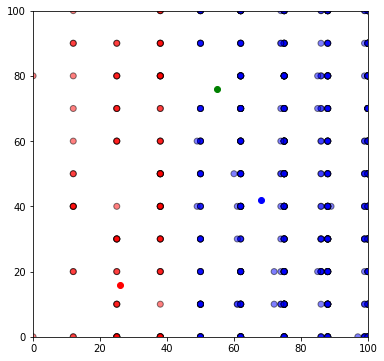

In [5]:
def assignment (df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = np.sqrt((df['cpu_percent'] -centroids[i][0])**2 + (df['temperature'] - centroids[i][1])**2)
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis =1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df
df = assignment(df,centroids)

print(df.head())

fig = plt.figure(figsize = (6,6))
plt.scatter(df['cpu_percent'] , df['sys_load_1'], color= df['color'] ,alpha = 0.5 , edgecolor = 'k')
colmap = {1: 'r',2: 'b',3: 'g'}

for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()





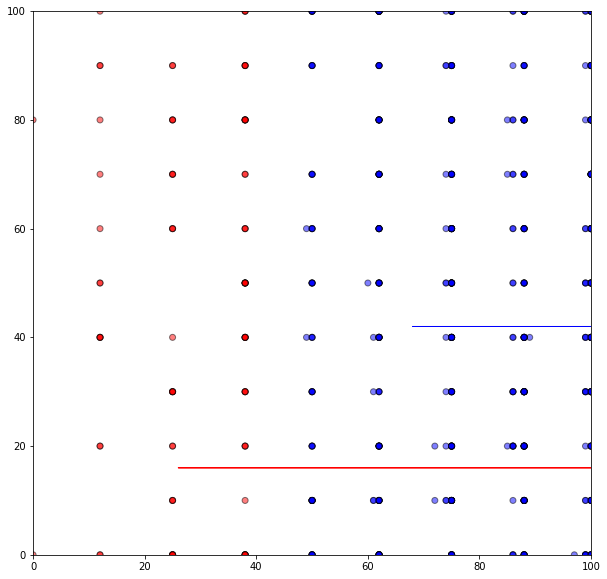

In [6]:
import copy
old_centroids = copy.deepcopy(centroids)
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest']==i]['cpu_percent'])
        centroids[i][0] = np.mean(df[df['closest']==i]['sys_load_1'])
    return k
centroids = update(centroids)
fig = plt.figure(figsize = (10,10))
ax = plt.axes()
plt.scatter(df['cpu_percent'] , df['sys_load_1'], color= df['color'] ,alpha = 0.5 , edgecolor = 'k')
    
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,100)
plt.ylim(0,100)

for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    
    dx = (centroids[i][0]-old_centroids[i][0])*0.75
    dy = (centroids[i][1]-old_centroids[i][1])*0.75
    
    ax.arrow(old_x, old_y,dx,dy,head_width = 2, head_length = 8, fc = colmap[i], ec = colmap[i])
plt.show()



(0, 100)

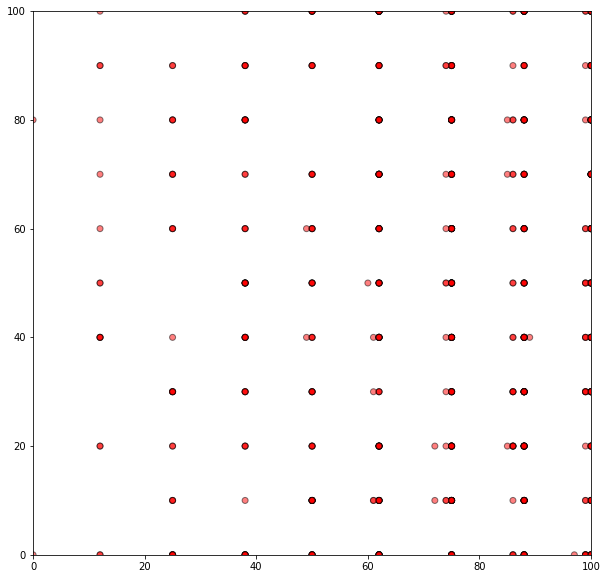

In [7]:
df= assignment(df, centroids)


fig = plt.figure(figsize = (10,10))
ax = plt.axes()
plt.scatter(df['cpu_percent'] , df['sys_load_1'], color= df['color'] ,alpha = 0.5 , edgecolor = 'k')
    
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,100)
plt.ylim(0,100)



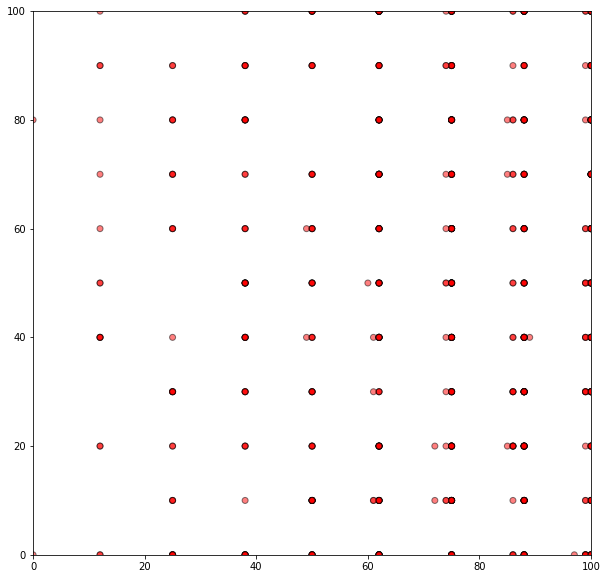

In [8]:
while True: 
    closest_centroids = df['closest'].copy(deep = True)
    centroids = update(centroids)
    df = assignment(df,centroids)
    if closest_centroids.equals(df['closest']):
         break

fig = plt.figure(figsize = (10,10))
plt.scatter(df['cpu_percent'] , df['sys_load_1'], color= df['color'] ,alpha = 0.5 , edgecolor = 'k')
    
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()
           
